$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000, 4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  vals = np.linalg.eigvals(A)
  return max(vals)/min(vals)

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

##4)

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$ To minimize f(x1,x2) we should check the condition number of the hessian matrix of f(x1,x2).

## 5)

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$ We can construct a matrix such that the values of the diagonal entries are the reciprocals of the square root of the eigenvalues of the hessian matrix. We can do this since the eigenvalues are all positive.
The hessian is positive definite, hence it will be similar to a diagonal matrix whose elements as its eigenvalues.

The value in column $i$ of D would be the reciprocal of the sq. root of the eigenvalue corresponding to variable $x_i$.

If the hessian matrix itself was diagonal, this would correspond to newtons method, but otherwise, it could be a decent approximation.

Write code to find the matrix $\mathbf{D}^k$. 

In [2]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  hes = evalh(x)
  vals = np.linalg.eigvals(hes)
  return np.array([[1/vals[0],0],[0,1/vals[1]]])

In [3]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  x1,x2 = x
  return (1500*x1**2 + 4*x1*x2 + x2**2).astype('float64')


In [4]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  x1,x2=x
  return np.array([3000*x1+4*x2,2*x2+4*x1],dtype='float64')

In [5]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
  return np.matmul(gradf,gradf.T)/(2*np.matmul(gradf,np.matmul(A,gradf.T))) 
  #Complete the code 
  

In [6]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  #Complete the code 
  alp = alpha_start
  while evalf(x - np.multiply(alp,gradf)) > evalf(x) - gamma*alp*np.matmul(gradf,gradf.T):
    alp *= rho
  return alp  
  

In [7]:
def compute_steplength_backtracking_scaled_direction(x, gradf, d, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(d) is np.ndarray and len(d) == 2 
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0
  assert type(gamma) is float and gamma>=0

  alp = alpha_start
  x = np.array(x,dtype='float64')
  while evalf(x - np.multiply(alp,d@gradf)) > evalf(x) - gamma*alp*np.matmul(gradf,d@gradf.T):
    alp *= rho
  return alp


  
  
  #Complete the code 

In [8]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [9]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500,2],[2,1]])
  x= start_x
  k = 0
 
  while np.linalg.norm(evalg(x)) > tol:
  
    if line_search_type == EXACT_LINE_SEARCH:
      step = compute_steplength_exact(evalg(x),A)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step = args[0] 
    

    elif line_search_type == BACKTRACKING_LINE_SEARCH:     
      alpha, rho, gamma = args
      step = compute_steplength_backtracking(x,evalg(x),alpha,rho,gamma)


    x =x- np.multiply(step,evalg(x))
    k += 1

   


  print(f'Iteration:{k}, Minimizer:{x}, min value:{evalf(x)}, gradient norm:{np.linalg.norm(evalg(x))}')

  return x, evalf(x),k    

  #Complete the code   


In [10]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol,D,alpha,rho,gamma):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  x = start_x
  k = 0
 
  while np.linalg.norm(evalg(x)) > tol:
    step = compute_steplength_backtracking_scaled_direction(x,evalg(x),D,alpha,rho,gamma)
    x =x- np.multiply(step,np.matmul(D,evalg(x)))
    D = compute_D_k(x)
    k+= 1
    

  print(f'Iteration:{k}, Minimizer:{x}, min value:{evalf(x)}, gradient norm:{np.linalg.norm(evalg(x))}')
  return x,evalf(x),k
  #Complete the code   

##7)

Minimizer of the function is (0,0), and min function value is 0.

In [11]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [12]:
#check gradient descent with exact line search 
x1,fx1,k1 = find_minimizer_gd(my_start_x,my_tol,EXACT_LINE_SEARCH)

Iteration:14075, Minimizer:[-7.44595231e-16  4.61544291e-13], min value:2.1248011077913554e-25, gradient norm:9.984203288726368e-13


In [13]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
x2,fx2,k2 = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)

Iteration:21985, Minimizer:[-4.78532202e-16  4.53575301e-13], min value:2.0520584176089396e-25, gradient norm:9.812595195142256e-13


In [14]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5

D = compute_D_k(my_start_x)

In [15]:
x3,fx3,k3 = find_minimizer_gdscaling(my_start_x,my_tol,D,alpha_start,rho,gamma)

Iteration:20, Minimizer:[-1.36742258e-17  5.59804399e-15], min value:3.1312377486575754e-29, gradient norm:2.1707744652710078e-14


## 8)

In [16]:
print(f'Exact line search: Iterations:{k1}, minimizer:{x1}, min value:{fx1}.\nBacktracking line search(no scaling): Iterations: {k2}, minimizer:{x2}, min value:{fx2}.\nBacktracking line search (with scaling): Iterations: {k3}, minimizer:{x3}, min value:{fx3}.\n')

Exact line search: Iterations:14075, minimizer:[-7.44595231e-16  4.61544291e-13], min value:2.1248011077913554e-25.
Backtracking line search(no scaling): Iterations: 21985, minimizer:[-4.78532202e-16  4.53575301e-13], min value:2.0520584176089396e-25.
Backtracking line search (with scaling): Iterations: 20, minimizer:[-1.36742258e-17  5.59804399e-15], min value:3.1312377486575754e-29.



Exact line search took just 2/3rd of the time as backtracking line search, but Backtracking line search with scaling took the least amount of iterations, 20, which was less than 0.1% the number of iterations taken by backtracking line search without scaling.

##9)

In [17]:
alph = [1.0, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter1 = []
for j in alph:
  x4,fx4,k4 = find_minimizer_gdscaling(my_start_x,my_tol,D,j,rho,gamma)
  iter1.append(k4)


Iteration:20, Minimizer:[-1.36742258e-17  5.59804399e-15], min value:3.1312377486575754e-29, gradient norm:2.1707744652710078e-14
Iteration:21, Minimizer:[-1.31416084e-16  4.96629638e-15], min value:4.795877539865447e-29, gradient norm:3.7450122831287327e-13
Iteration:32, Minimizer:[-2.50270917e-16  9.45874746e-15], min value:1.7395220370774986e-28, gradient norm:7.132028359875126e-13
Iteration:47, Minimizer:[-3.10257539e-16  1.17410449e-14], min value:2.6767075533875134e-28, gradient norm:8.840882404805229e-13
Iteration:62, Minimizer:[-2.32838753e-16  8.82892109e-15], min value:1.5104781515698985e-28, gradient norm:6.634114700196785e-13
Iteration:83, Minimizer:[-3.04816128e-16  1.15976157e-14], min value:2.5973343603361736e-28, gradient norm:8.683360499673765e-13
Iteration:146, Minimizer:[-3.31238110e-16  1.26889064e-14], min value:3.0877417760576744e-28, gradient norm:9.43265423092857e-13
Iteration:396, Minimizer:[-3.49507546e-16  1.35026863e-14], min value:3.4667866093131074e-28, gr

In [18]:
iter2 = []
for j in alph:
  x5,fx5,k5 = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,j,rho,gamma)
  iter2.append(k5)


Iteration:21985, Minimizer:[-4.78532202e-16  4.53575301e-13], min value:2.0520584176089396e-25, gradient norm:9.812595195142256e-13
Iteration:15941, Minimizer:[-5.48799355e-16  4.71515450e-13], min value:2.2174352131747877e-25, gradient norm:9.708813139252356e-13
Iteration:6750, Minimizer:[-7.18643891e-16  4.89175378e-13], min value:2.386610528547938e-25, gradient norm:9.956135981633041e-13
Iteration:6887, Minimizer:[-6.07554226e-16  4.94036636e-13], min value:2.43425264283868e-25, gradient norm:9.975216922648971e-13
Iteration:21985, Minimizer:[-4.78532202e-16  4.53575301e-13], min value:2.0520584176089396e-25, gradient norm:9.812595195142256e-13
Iteration:11362, Minimizer:[-7.24091328e-16  4.84454819e-13], min value:2.3407977615582728e-25, gradient norm:9.940576715007166e-13
Iteration:21985, Minimizer:[-4.78532202e-16  4.53575301e-13], min value:2.0520584176089396e-25, gradient norm:9.812595195142256e-13
Iteration:11362, Minimizer:[-7.24091328e-16  4.84454819e-13], min value:2.3407977

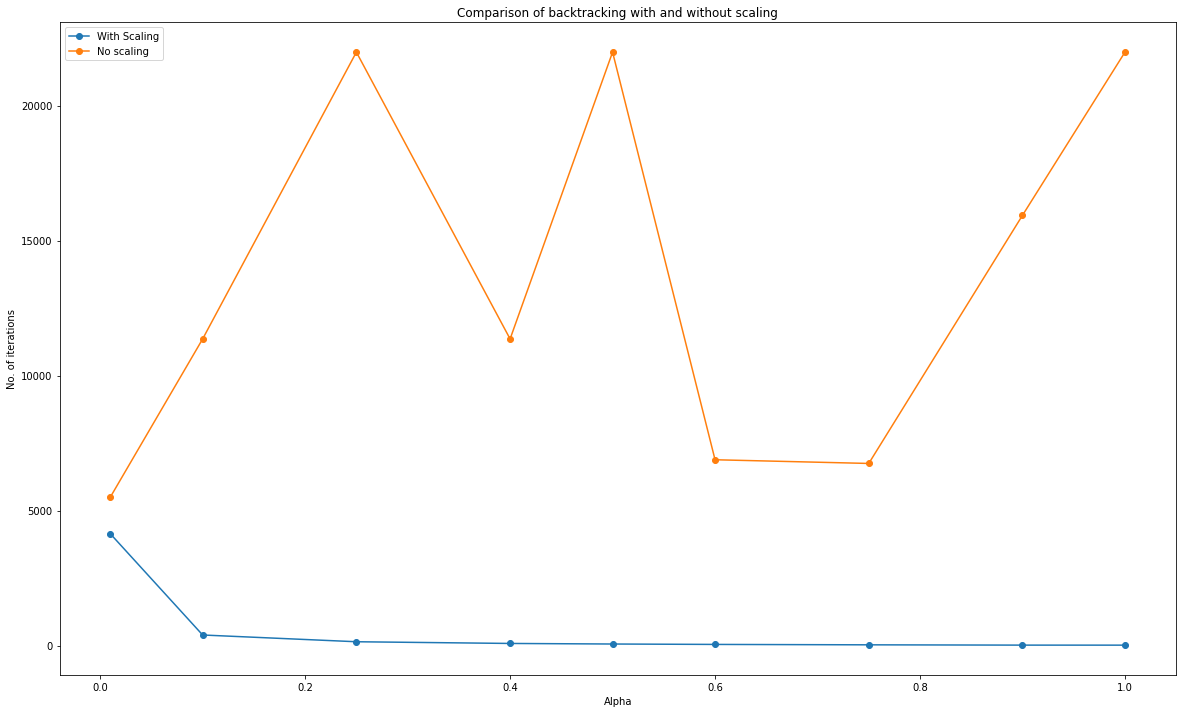

In [19]:
plt.figure(figsize=(20,12))
plt.plot(alph,iter1,marker='o',label='With Scaling')
plt.plot(alph,iter2,marker='o',label='No scaling')
plt.title('Comparison of backtracking with and without scaling')
plt.xlabel('Alpha')
plt.ylabel('No. of iterations')
plt.legend()
plt.show()

Number of iterations with scaling is quite less compared to without scaling, for all values of alpha. 
For backtracking without scaling, the number of iterations are quite variable over alpha, with iterations lying in the range [5509,21985]. For backtracking without scaling, the range is much narrower [20,396] with the exception of alpha=0.01 which took 4141 iterations.

In terms of minimizers, backtracking with scaling gives  marginally more accurate solutions, with all minimum function value errors of the order $10^{-28}$, while backtracking without scaling gives errors of the order $10^{-25}$
The the x1 value of the minimizers in the both methods are almost of the same order, but there is slight different in order of x2 values.

## 10)

In [20]:
rhov = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter3 = []
for j in rhov:
  x5,fx5,k5 = find_minimizer_gdscaling(my_start_x,my_tol,D,1.0,j,gamma)
  iter3.append(k5)

Iteration:14, Minimizer:[-1.72054923e-16  9.24207245e-16], min value:4.4622446453036665e-29, gradient norm:5.124692548118662e-13
Iteration:14, Minimizer:[-1.46100971e-16  5.54648152e-14], min value:3.0759501169042234e-27, gradient norm:2.429483981344482e-13
Iteration:15, Minimizer:[-8.51303692e-17  2.19050144e-14], min value:4.832412957752553e-28, gradient norm:1.7331105944837893e-13
Iteration:17, Minimizer:[-2.61938545e-17  1.45993434e-14], min value:2.126403529835592e-28, gradient norm:3.5409846120542553e-14
Iteration:20, Minimizer:[-1.36742258e-17  5.59804399e-15], min value:3.1312377486575754e-29, gradient norm:2.1707744652710078e-14
Iteration:23, Minimizer:[-8.05629110e-18  5.21636566e-15], min value:2.713972816754645e-29, gradient norm:1.0912518051701204e-14
Iteration:34, Minimizer:[-3.95539650e-18  2.57320488e-15], min value:6.604138899895224e-30, gradient norm:5.366416687183e-15
Iteration:77, Minimizer:[-2.12500242e-18  1.53402127e-15], min value:2.346955525076971e-30, gradient

In [21]:
iter4 = []
for j in rhov:
  x6,fx6,k6 = find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,1.0,j,0.5)
  iter4.append(k6)

Iteration:127, Minimizer:[-6.44686128e-16  4.90962904e-13], min value:2.404019351870065e-25, gradient norm:9.798001357674056e-13
Iteration:1471, Minimizer:[-6.99968590e-16  4.40149178e-13], min value:1.932338703071826e-25, gradient norm:9.408157210139341e-13
Iteration:3135, Minimizer:[-7.15454842e-16  4.83616543e-13], min value:2.332687511412074e-25, gradient norm:9.87376753178227e-13
Iteration:15834, Minimizer:[-7.07691748e-16  4.70469643e-13], min value:2.2076113616544364e-25, gradient norm:9.686193409034207e-13
Iteration:21985, Minimizer:[-4.78532202e-16  4.53575301e-13], min value:2.0520584176089396e-25, gradient norm:9.812595195142256e-13
Iteration:20049, Minimizer:[-5.16461460e-16  4.67846629e-13], min value:2.1831406770108246e-25, gradient norm:9.875958276333466e-13
Iteration:24570, Minimizer:[-5.67128954e-16  4.70177132e-13], min value:2.204823842206756e-25, gradient norm:9.550712705275732e-13
Iteration:45435, Minimizer:[-4.35224428e-16  4.42644725e-13], min value:1.95447883402

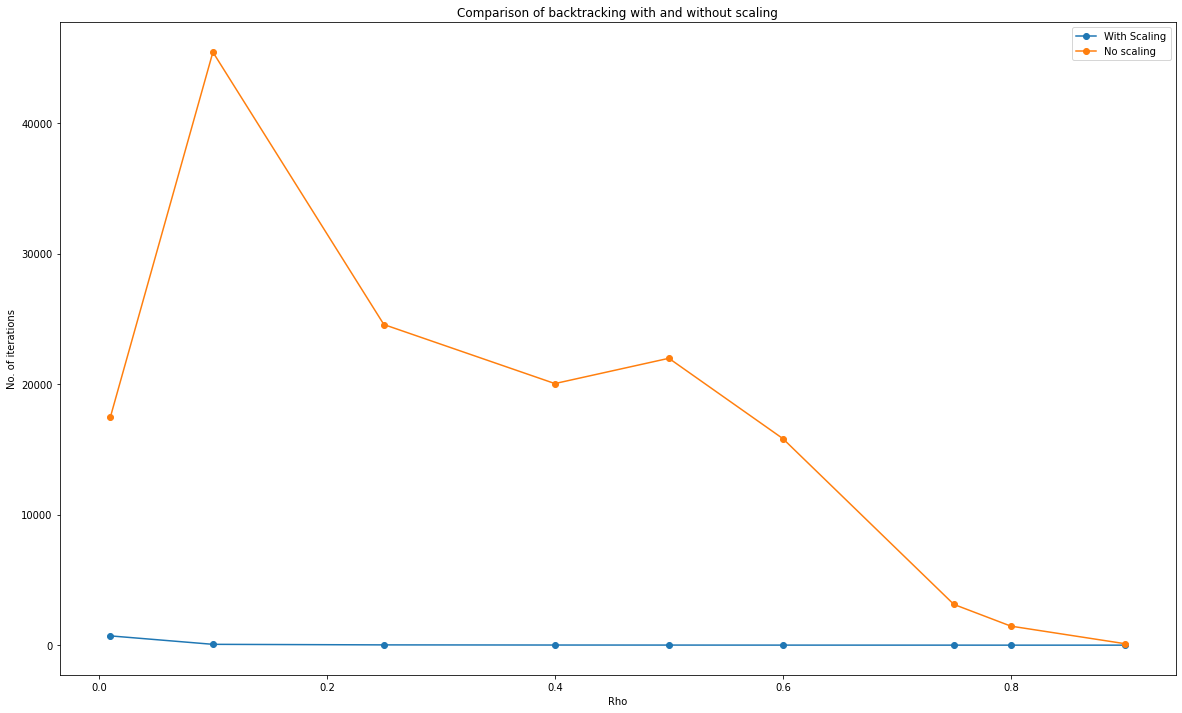

In [22]:
plt.figure(figsize=(20,12))
plt.plot(rhov,iter3,marker='o',label='With Scaling')
plt.plot(rhov,iter4,marker='o',label='No scaling')
plt.title('Comparison of backtracking with and without scaling')
plt.xlabel('Rho')
plt.ylabel('No. of iterations')
plt.legend()
plt.show()

As the value of rho increases, the difference in number of iterations between both methods starts decreasing generally. But for rho values <= 0.6, backtracking without scaling takes at least around 1000 times more iterations than with scaling. 
The number of iterations is in a slightly wider range [14,77] (exceptiion: 724 for rho =0.01) for backtracking with scaling, than it was for varying alpha values.

In terms of minimizers, backtracking with scaling gives  marginally more accurate solutions, with all minimum function value errors of the order $10^{-26} \text{ to } 10^{-30}$, while backtracking without scaling gives errors of the order $10^{-25}$
The minimizers in the both methods are almost of the same order